In [21]:
import re
import os
import numpy as np
import pandas
import logging
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
models   = ('tappy', 'tidegui', 't_tide', 'utide', 'getijsys', 'fes2012')
stations = ('HVH', 'Honolulu')
def n_comments(fname, comment):
    with open(fname, 'r') as f:
        n_lines = 0
        pattern = re.compile("^\s*{0}".format(comment))
        for l in f:
            if pattern.search(l) is None:
                break
            else:
                n_lines += 1
    return n_lines
n_comments('tidegui/HVH_noos_2007_2007_tidegui_prediction.txt', '#')


11

In [5]:
kwargs = {
    'tappy': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    'tidegui': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    't_tide': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    'utide': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    'hatyan': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    'fes2012': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"]),
    'measurements': dict(delim_whitespace=True, names=("time", "waterlevel"), parse_dates=["time"])
}
dfs = []
for station in stations:
    for from_year in (2007, 2013):
        model    = 'measurements'
        filename = '{model}/{station}_noos_{from_year}_{model}.txt'.format(**locals())
        df = pandas.read_csv(filename, skiprows=n_comments(filename, '#'), **kwargs[model])
        df['model']     = 'measurements'
        df['from_year'] = from_year
        df['to_year']   = from_year
        df['station']   = station
        dfs.append(df)
for station in ('HVH', 'Honolulu'):
    for from_year in (2007, 2013):
        for to_year in (2007, 2013):
            for model in models:
                filename = '{model}/{station}_noos_{from_year}_{to_year}_{model}_prediction.txt'.format(**locals())
                exists = os.path.exists(filename)
                
                if exists:
                    df = pandas.read_csv(filename, skiprows=n_comments(filename, '#'), **kwargs[model])
                    df['model']     = model
                    df['from_year'] = from_year
                    df['to_year']   = to_year
                    df['station']   = station
                    dfs.append(df)
predictions = pandas.concat(dfs)

In [6]:
np.unique(predictions['model'])

array(['fes2012', 'measurements', 't_tide', 'tappy', 'tidegui', 'utide'], dtype=object)

In [7]:
len(predictions)

2014776

In [8]:
predictions.columns

Index([u'time', u'waterlevel', u'model', u'from_year', u'to_year', u'station'], dtype='object')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


(734972.0, 734974.0)

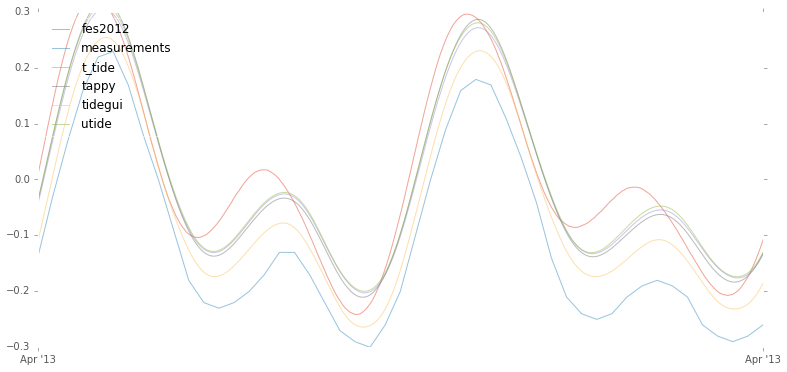

In [9]:

from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import datetime

def plot(label, df):
    months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
    monthsFmt = DateFormatter("%b '%y")
    ax.plot([x for x in df.time], df.waterlevel, label=label, alpha=0.5)
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.set_ylim(-.3, .3)
    
from IPython.html.widgets import interactive
fig, ax = plt.subplots(figsize=(13,6))
groups = predictions[np.logical_and.reduce([
        predictions['from_year'] == 2013,
        predictions['to_year'] == 2013,
        predictions['station'] == 'Honolulu',
        np.in1d(predictions['model'],('tappy','t_tide', 'utide','tidegui', 'fes2012', 'measurements'))
    ])].groupby('model')
for key, group in groups:
    plot(key, group)
ax.set_xlim(datetime.datetime(2013,4,14),datetime.datetime(2013,4,16))


In [10]:
HVH = predictions.query('station == "HVH"').pivot_table(index='time',columns=['station', 'model', 'from_year', 'to_year'], values=['waterlevel']) # 
HVH.head()

#import numpy as np
#np.sqrt(np.mean((df['waterlevel_measured'] - df['waterlevel_tappy']) ** 2))

waterlevel                                                \
station                    HVH                                                 
model                  fes2012      measurements        t_tide                 
from_year                 2007 2013         2007 2013     2007          2013   
to_year                   2007 2013         2007 2013     2007 2013     2007   
time                                                                           
2007-01-01 00:00:00      0.673  NaN         0.95  NaN  0.93595  NaN  0.89792   
2007-01-01 00:10:00      0.670  NaN         0.91  NaN  0.96567  NaN  0.93251   
2007-01-01 00:20:00      0.674  NaN         0.86  NaN  0.98585  NaN  0.95778   
2007-01-01 00:30:00      0.683  NaN         0.85  NaN  0.99742  NaN  0.97443   
2007-01-01 00:40:00      0.695  NaN         0.81  NaN  1.00136  NaN  0.98322   

                                                                             \
station                                                                       
model                        tappy                     tidegui                
from_year                     2007           2013         2007         2013   
to_year             2013      2007 2013      2007 2013    2007 2013    2007   
time                                                                          
2007-01-01 00:00:00  NaN  1.108425  NaN  1.000825  NaN  1.1281  NaN  0.9494   
2007-01-01 00:10:00  NaN  1.139520  NaN  1.036491  NaN  1.1587  NaN  0.9864   
2007-01-01 00:20:00  NaN  1.159541  NaN  1.060812  NaN  1.1731  NaN  1.0081   
2007-01-01 00:30:00  NaN  1.169529  NaN  1.074457  NaN  1.1727  NaN  1.0150   
2007-01-01 00:40:00  NaN  1.170635  NaN  1.078294  NaN  1.1600  NaN  1.0085   

                                                      
station                                               
model                       utide                     
from_year                    2007          2013       
to_year             2013     2007 2013     2007 2013  
time                                                  
2007-01-01 00:00:00  NaN  1.04187  NaN  0.99510  NaN  
2007-01-01 00:10:00  NaN  1.07142  NaN  1.02889  NaN  
2007-01-01 00:20:00  NaN  1.09155  NaN  1.05307  NaN  
2007-01-01 00:30:00  NaN  1.10326  NaN  1.06846  NaN  
2007-01-01 00:40:00  NaN  1.10755  NaN  1.07599  NaN

In [11]:
Honolulu = predictions.query('station == "Honolulu"').pivot_table(index='time',columns=['station', 'model', 'from_year', 'to_year'], values=['waterlevel']) # 
Honolulu.head()

waterlevel                                                \
station               Honolulu                                                 
model                  fes2012      measurements        t_tide                 
from_year                 2007 2013         2007 2013     2007          2013   
to_year                   2007 2013         2007 2013     2007 2013     2007   
time                                                                           
2007-01-01 00:00:00     -0.090  NaN      -0.0339  NaN -0.04654  NaN -0.07660   
2007-01-01 00:10:00     -0.097  NaN          NaN  NaN -0.04902  NaN -0.08023   
2007-01-01 00:20:00     -0.105  NaN          NaN  NaN -0.05254  NaN -0.08483   
2007-01-01 00:30:00     -0.114  NaN          NaN  NaN -0.05709  NaN -0.09042   
2007-01-01 00:40:00     -0.124  NaN          NaN  NaN -0.06267  NaN -0.09697   

                                                                             \
station                                                                       
model                        tappy                     tidegui                
from_year                     2007           2013         2007         2013   
to_year             2013      2007 2013      2007 2013    2007 2013    2007   
time                                                                          
2007-01-01 00:00:00  NaN -0.045872  NaN -0.060161  NaN -0.0573  NaN -0.0816   
2007-01-01 00:10:00  NaN -0.048330  NaN -0.064394  NaN -0.0610  NaN -0.0860   
2007-01-01 00:20:00  NaN -0.051783  NaN -0.069576  NaN -0.0658  NaN -0.0910   
2007-01-01 00:30:00  NaN -0.056243  NaN -0.075686  NaN -0.0719  NaN -0.0967   
2007-01-01 00:40:00  NaN -0.061709  NaN -0.082698  NaN -0.0793  NaN -0.1032   

                                                      
station                                               
model                       utide                     
from_year                    2007          2013       
to_year             2013     2007 2013     2007 2013  
time                                                  
2007-01-01 00:00:00  NaN -0.04415  NaN -0.07973  NaN  
2007-01-01 00:10:00  NaN -0.04667  NaN -0.08350  NaN  
2007-01-01 00:20:00  NaN -0.05024  NaN -0.08827  NaN  
2007-01-01 00:30:00  NaN -0.05488  NaN -0.09402  NaN  
2007-01-01 00:40:00  NaN -0.06058  NaN -0.10073  NaN

In [12]:
table = predictions.pivot_table(index='time',columns=['station', 'model', 'from_year', 'to_year'], values=['waterlevel']) # 
results = []
for station in ('HVH', 'Honolulu'):
    for from_year in (2007, 2013):
        for to_year in (2007, 2013):
            for model in models:
                try:
                    SE = (np.array(table['waterlevel'][station]['measurements'][to_year][to_year]) - np.array(table['waterlevel'][station][model][from_year][to_year]))**2
                except KeyError:
                    continue
                MSE = np.mean(SE[~np.isnan(SE)])
                results.append(dict(station=station, from_year=from_year, to_year=to_year, model=model, RMSE=np.sqrt(MSE), MSE=MSE))
                if from_year == to_year:
                    continue
                try:
                    SE = (np.array(table['waterlevel'][station][model][to_year][to_year]) - np.array(table['waterlevel'][station][model][from_year][to_year]))**2
                except KeyError:
                    continue
                MSE = np.mean(SE[~np.isnan(SE)])
                results.append(dict(station=station, from_year=from_year, to_year=to_year, model=model + '_self', RMSE=np.sqrt(MSE), MSE=MSE))
results = pandas.DataFrame(data=results, columns=('station', 'from_year', 'to_year', 'model', 'MSE', 'RMSE'))
results.sort()    
results

station  from_year  to_year         model       MSE      RMSE
0        HVH       2007     2007         tappy  0.065592  0.256110
1        HVH       2007     2007       tidegui  0.063843  0.252672
2        HVH       2007     2007        t_tide  0.080183  0.283166
3        HVH       2007     2007         utide  0.067264  0.259353
4        HVH       2007     2007       fes2012  0.250352  0.500352
5        HVH       2007     2013         tappy  0.082594  0.287392
6        HVH       2007     2013    tappy_self  0.025333  0.159164
7        HVH       2007     2013       tidegui  0.062017  0.249032
8        HVH       2007     2013  tidegui_self  0.010669  0.103292
9        HVH       2007     2013        t_tide  0.083658  0.289236
10       HVH       2007     2013   t_tide_self  0.020989  0.144876
11       HVH       2007     2013         utide  0.075981  0.275646
12       HVH       2007     2013    utide_self  0.016298  0.127662
13       HVH       2013     2007         tappy  0.087740  0.296209
14       HVH       2013     2007    tappy_self  0.022710  0.150697
15       HVH       2013     2007       tidegui  0.073736  0.271543
16       HVH       2013     2007  tidegui_self  0.009893  0.099461
17       HVH       2013     2007        t_tide  0.100705  0.317341
18       HVH       2013     2007   t_tide_self  0.020549  0.143350
19       HVH       2013     2007         utide  0.087281  0.295433
20       HVH       2013     2007    utide_self  0.016154  0.127098
21       HVH       2013     2013         tappy  0.057465  0.239718
22       HVH       2013     2013       tidegui  0.051348  0.226600
23       HVH       2013     2013        t_tide  0.062265  0.249530
24       HVH       2013     2013         utide  0.058555  0.241980
25       HVH       2013     2013       fes2012  0.266190  0.515936
26  Honolulu       2007     2007         tappy  0.002272  0.047669
27  Honolulu       2007     2007       tidegui  0.001865  0.043185
28  Honolulu       2007     2007        t_tide  0.002265  0.047596
29  Honolulu       2007     2007         utide  0.002276  0.047705
30  Honolulu       2007     2007       fes2012  0.004439  0.066630
31  Honolulu       2007     2013         tappy  0.003540  0.059501
32  Honolulu       2007     2013    tappy_self  0.000579  0.024061
33  Honolulu       2007     2013       tidegui  0.001893  0.043507
34  Honolulu       2007     2013  tidegui_self  0.000662  0.025738
35  Honolulu       2007     2013        t_tide  0.003428  0.058553
36  Honolulu       2007     2013   t_tide_self  0.000514  0.022674
37  Honolulu       2007     2013         utide  0.003427  0.058537
38  Honolulu       2007     2013    utide_self  0.000637  0.025242
39  Honolulu       2013     2007         tappy  0.002867  0.053543
40  Honolulu       2013     2007    tappy_self  0.000609  0.024671
41  Honolulu       2013     2007       tidegui  0.002459  0.049590
42  Honolulu       2013     2007  tidegui_self  0.000594  0.024376
43  Honolulu       2013     2007        t_tide  0.002787  0.052789
44  Honolulu       2013     2007   t_tide_self  0.000521  0.022832
45  Honolulu       2013     2007         utide  0.002882  0.053684
46  Honolulu       2013     2007    utide_self  0.000646  0.025411
47  Honolulu       2013     2013         tappy  0.002963  0.054435
48  Honolulu       2013     2013       tidegui  0.001230  0.035077
49  Honolulu       2013     2013        t_tide  0.002914  0.053986
50  Honolulu       2013     2013         utide  0.002931  0.054142
51  Honolulu       2013     2013       fes2012  0.004429  0.066547

In [13]:
# 
# O2007 - P2007  O2007 - P2013  P2013 - P2007
# Cross prediction error =  constituent error + meteo error
0.073736 - 0.009893 == 0.063843
0.002459 - 0.000594 == 0.001865

True

In [14]:
import lxml.etree

In [26]:
tree     = lxml.etree.ElementTree()
records = []
files   = []

for model in models:
    for station in stations:
        for from_year in (2007, 2013):
            filename = os.path.join(model, '{station}_noos_{from_year}_{model}_analysis.xml'.format(**locals()))
            files.append(filename)
substitutes = {
    "A0": "Z0",
    "THE1": "THETA1"
}
def normalize(name):
    name = name.upper()
    name = name.replace('(', '').replace(')','')
    name = substitutes.get(name, name)
    return name
for name in files:
    if not os.path.exists(name):
        logging.warn('%s %s', name, 'does not exist')
        continue
    doc = tree.parse(open(name))
    for element in doc.findall('.//Harmonic'):
        row = {"file": name}
        for sub in element.getchildren():
            row[sub.tag] = sub.text.strip()
            if sub.tag == 'name':
                row['normalized'] = normalize(sub.text.strip())
            
        records.append(row)


In [28]:
import pandas
df = pandas.DataFrame.from_records(records).sort('speed')
df_sel = df[df['file'].apply(lambda x:'2013' in x and 'HVH' in x)]
a = df_sel.pivot(index='normalized', columns='file', values='speed')
a.to_csv('speeds.csv')

a = df_sel.pivot(index='normalized', columns='file', values=('amplitude'))
a.to_csv('amplitudes.csv')



In [29]:
# does not work in python 3
df.to_excel('constituents.xls')

In [30]:
import dateutil.parser